# Fitting

In [1]:
import matplotlib.pyplot as plt
from pyhdx import PeptideMasterTable, read_dynamx, KineticsFitting
from pathlib import Path

C:\Users\jhsmi\Miniconda3\envs\py37_panel_dev\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\jhsmi\Miniconda3\envs\py37_panel_dev\lib\site-packages\setuptools\distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


We load the sample SecB dataset, apply the control, and split the dataset into ``KineticSeries``.

In [2]:
fpath = Path() / '..' / '..' / 'tests' / 'test_data' / 'ecSecB_apo.csv'
data = read_dynamx(fpath)
master_table = PeptideMasterTable(data, drop_first=1, ignore_prolines=True)
master_table.set_control(('Full deuteration control', 0.167))
states = master_table.groupby_state()
series = states['SecB WT apo']
series.make_uniform()

From this ``KineticsSeries`` object we can make a ``KineticsFitting`` object. The ``bounds`` parameter defines the upper
and lower limit of the kinetic rates which are fitted. Temperature (in Kelvin) and pH of the D-labelling step are used to
calculate the intrinsic D-exchange rate. 

In [3]:
kf = KineticsFitting(series, bounds=(1e-2, 300), temperature=303.15, pH=8.)

We can now start the first step of fitting, by weighted averaging. The ``RuntimeWarning`` messages are normal and can be ignored.

In [ ]:
result_wt_avg = kf.weighted_avg_fit()

C:\Users\jhsmi\Miniconda3\envs\py37_panel_dev\lib\site-packages\symfit\core\objectives.py:321: RuntimeWarning: overflow encountered in square
  (dep_var_value - dep_data) ** 2 / sigma ** 2
<string>:2: RuntimeWarning: overflow encountered in exp
C:\Users\jhsmi\Miniconda3\envs\py37_panel_dev\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


The return value is a ``KineticsFitResult`` object. This object has a list of models, intervals in withing the protein 
sequence to which these models apply, and their corresponding ``symfit`` fit result with parameter values. The effective 
exchange rate can be extracted, as well as other fit parameters, from this object:

In [ ]:
output = result_wt_avg.output
output.dtype.names

In [ ]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(output['r_number'], output['rate'])
ax.set_xlabel('Residue number')
ax.set_ylabel('Rate (min⁻¹)')
None

We can now use the weighted averaging fitted result as initial guesses for the global fitting step. This returns a
``TFFitResult`` object, which has only one interval and model.

In [9]:
result_global = kf.global_fit(output)

WARNING


TypeError: '<' not supported between instances of 'NoneType' and 'float'

Text(0, 0.5, 'Rate (min⁻¹)')

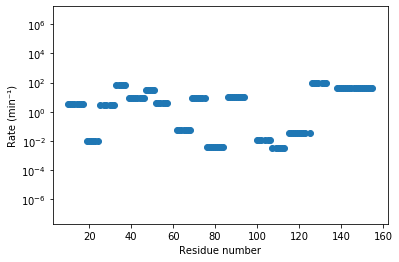

In [15]:
output_global = result_global.get_output(['rate', 'tau1', 'tau2', 'r'])
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(output_global['r_number'], output_global['rate'])
ax.set_xlabel('Residue number')
ax.set_ylabel('Rate (min⁻¹)')

